In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# **Problem Statement:**
An online retail store is trying to understand the various customer purchase patterns for their
firm, you are required to give enough evidence based insights to provide the same.

# **Project Objective:**
The objective of this project is to find useful insights about the customer purchasing behaviour by using machine learning techniuqes to improve customer experiences and improve sales and segmenting the customers based on their purchasing behavior.

# **Data Description:**¶
The Online Retails dataset is a collection of data from an online retail store. It is a transnational dataset which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. It contains information about customers, products, and orders. The dataset can be used to analyze customer behavior, product trends, and other insights. It can also be used to build predictive models to predict customer behavior and product trends.

In [2]:
df = pd.read_csv(r"C:\Users\Pragati Parmar\OneDrive\Desktop\ME\PYTHON\Capstone Project\OnlineRetail.csv",encoding = 'unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# **Data Pre-processing Steps and Inspiration:**
The Pre-processing of the data includes the following steps:

Data Cleaning: Removing missing or invalid data points, as well as outliers that may skew the results.

Data Preparation: Analysing Customers based on 3 factors- Recency, Frequency and Monetary.

Data Transformation: Transforming the data into a format that is more suitable for the analysis.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df.CustomerID.value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [11]:
df.Quantity.value_counts()

Quantity
 1        73314
 12       60033
 2        58003
 6        37688
 4        32183
          ...  
 828          1
 560          1
-408          1
 512          1
-80995        1
Name: count, Length: 436, dtype: int64

In [12]:
df.Country.value_counts()

Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [13]:
df.CustomerID.unique().shape

(4372,)

In [14]:
df.StockCode.unique().shape

(3684,)

In [15]:
df.Description.unique().shape

(3896,)

In [16]:
df.InvoiceNo.unique().shape

(22190,)

In [17]:
df["TotalAmount"] = df['Quantity']*df["UnitPrice"]

In [18]:
df['TotalAmount']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalAmount, Length: 406829, dtype: float64

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [20]:
df=df[~(df['TotalAmount']<0)] #Remove negative or return transactions

In [21]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [22]:
df.shape

(397924, 9)

We'll be analyzing the customer data through the lens of RFM analysis. This method considers three key aspects: recency, frequency, and monetary value. By examining these factors, we can gain a deeper understanding of customer behavior.

Recency (R): This calculates how recently a customer made a purchase, typically measured in days since their last purchase compared to the most recent date in the dataset. It identifies how active a customer is.

Frequency (F): This determines how often a customer makes purchases. It's calculated by counting the number of unique invoice dates associated with a customer, indicating their purchase behavior.

Monetary Value (M): This represents the total amount a customer has spent. You'll be using the "Total_Amount" column established earlier to calculate this metric..

The easiest is to calcualte the M-monetary value. We will be using the Total_Amount column that we have created before.

In [23]:
#It is the total amount spent by each customer.
m = df.groupby('CustomerID')['TotalAmount'].sum()
m = pd.DataFrame(m).reset_index()
m.head()

,CustomerID,TotalAmount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [24]:
#number of times each customer purchased from the store
f = df.groupby('CustomerID')['InvoiceNo'].count()
f =f.reset_index()
f.columns = ['CustomerID','Frequency']
f.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [25]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%m/%d/%Y %H:%M')

last_day = max(df['InvoiceDate']) #last purchase done in the data set

In [26]:
#the last date of purchase of each customer
df['diffday'] = last_day-df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,diffday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [27]:
import datetime as dt

In [28]:
r = df.groupby('CustomerID')['diffday'].min()
r =r.reset_index()
r['diffday'] = r['diffday'].dt.days
r.columns = ['CustomerID','diffday']
r.head()

,CustomerID,diffday
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [29]:
mf = pd.merge(m,f, on = 'CustomerID', how = 'inner')
rfm = pd.merge(mf, r,on = 'CustomerID', how = 'inner' )
rfm.columns = ['CustomerID', 'Monetary', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [30]:
rfm.shape

(4339, 4)

In [31]:
rfm.columns = ['CustomerID', 'Monetary', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [32]:
rfm.describe()

,CustomerID,Monetary,Frequency,Recency
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,2053.793018,91.708689,91.518322
std,1721.889758,8988.248381,228.792852,100.009747
min,12346.000000,0.000000,1.000000,0.000000
25%,13812.500000,307.245000,17.000000,17.000000
50%,15299.000000,674.450000,41.000000,50.000000
75%,16778.500000,1661.640000,100.000000,141.000000
max,18287.000000,280206.020000,7847.000000,373.000000


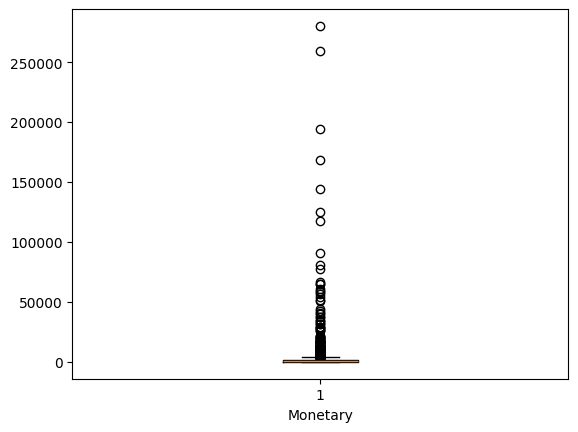

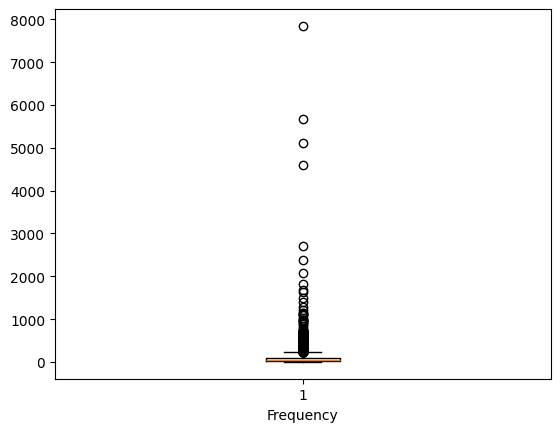

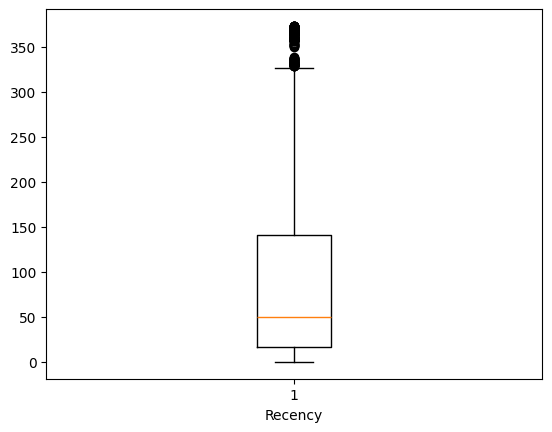

In [33]:
plt.boxplot(rfm['Monetary'])
plt.xlabel('Monetary')
plt.show()

plt.boxplot(rfm['Frequency'])
plt.xlabel('Frequency')
plt.show()

plt.boxplot(rfm['Recency'])
plt.xlabel('Recency')
plt.show()

In [34]:
Q1 = rfm.Monetary.quantile(0.25)
Q3 = rfm.Monetary.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Monetary >= Q1 - 1.5 * IQR) & (rfm.Monetary <= Q3 + 1.5 * IQR)]

Q1 = rfm.Recency.quantile(0.25)
Q3 = rfm.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5 * IQR) & (rfm.Recency <= Q3 + 1.5 * IQR)]

Q1 = rfm.Frequency.quantile(0.25)
Q3 = rfm.Frequency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5 * IQR) & (rfm.Frequency <= Q3 + 1.5 * IQR)]

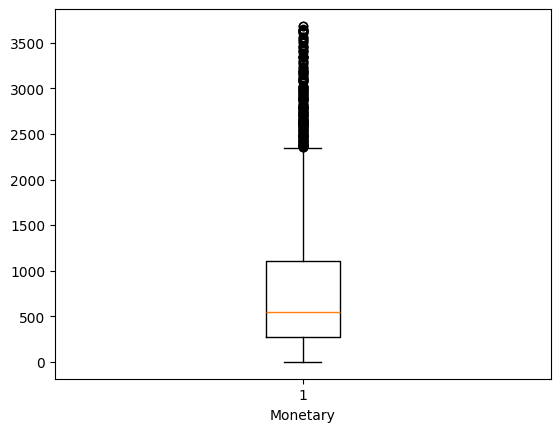

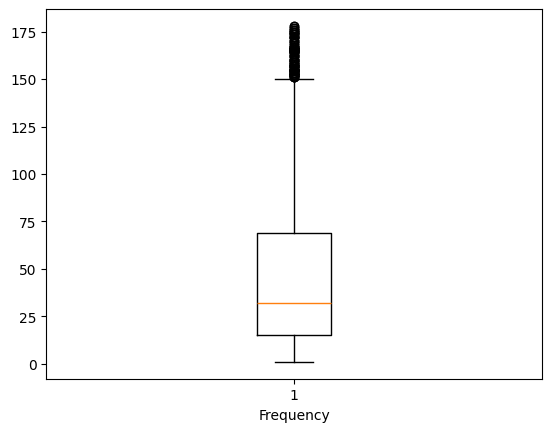

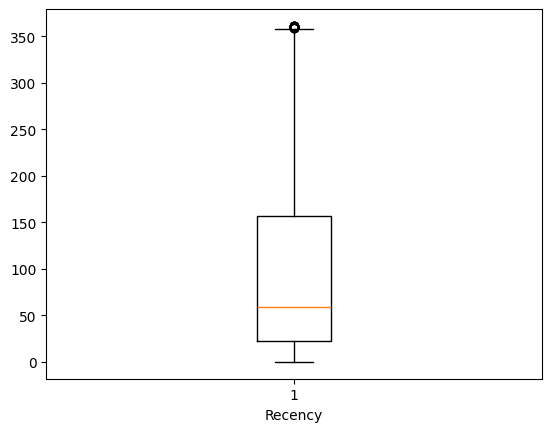

In [35]:
plt.boxplot(rfm['Monetary'])
plt.xlabel('Monetary')
plt.show()

plt.boxplot(rfm['Frequency'])
plt.xlabel('Frequency')
plt.show()

plt.boxplot(rfm['Recency'])
plt.xlabel('Recency')
plt.show()

In [36]:
rfm.shape

(3587, 4)

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [38]:
# Rescaling the Attributes

rfm_df = rfm[['Monetary', 'Frequency', 'Recency']]

scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled

array([[ 1.2935059 , -0.3842838 , -0.24593353],
       [ 1.24122068,  0.63034828, -0.83030675],
       [-0.63355155, -0.7224945 ,  2.20634696],
       ...,
       [-0.9676026 , -0.96407357,  0.8602015 ],
       [-0.83951764, -0.84328404, -0.94509434],
       [ 1.34625218,  0.55787456, -0.57986108]])

In [39]:
rfm_df = pd.DataFrame(rfm_df_scaled)
rfm_df.columns = ['Monetary', 'Frequency', 'Recency']
rfm_df.head()

,Monetary,Frequency,Recency
0,1.293506,-0.384284,-0.245934
1,1.241221,0.630348,-0.830307
2,-0.633552,-0.722495,2.206347
3,2.227236,0.920243,-0.652908
4,-0.956827,-1.036547,1.100212


# **Choosing the Algorithm for the Project:**
The algorithm that should be used for this project depends on the type of data we are working with and the type of problem we are trying to solve. For example, if we are working with customer reviews, we can use a supervised learning algorithm such as Logistic Regression or Support Vector Machines. If we are working with machine learning, we can use an unsupervised learning algorithm such as K-Means Clustering or Hierarchical Clustering. Ultimately, the best algorithm.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environm

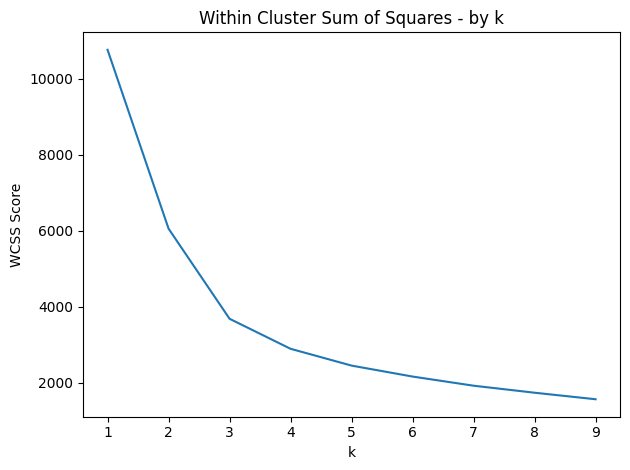

In [40]:
k_values = list(range(1,10))
wcss_list = []
for k in k_values:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit_transform(rfm_df)
    wcss_list.append(kmeans.inertia_)
plt.plot(k_values,wcss_list)
plt.xlabel("k")
plt.ylabel("WCSS Score")
plt.title("Within Cluster Sum of Squares - by k")
plt.tight_layout()
plt.show()

In [41]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(rfm_df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


KMeans(n_clusters=3)

In [42]:
kmeans.labels_

array([2, 1, 0, ..., 0, 2, 1])

In [43]:
# Assining the labels

rfm_df['ClusterID'] = kmeans.labels_
rfm_df.head()

,Monetary,Frequency,Recency,ClusterID
0,1.293506,-0.384284,-0.245934,2
1,1.241221,0.630348,-0.830307,1
2,-0.633552,-0.722495,2.206347,0
3,2.227236,0.920243,-0.652908,1
4,-0.956827,-1.036547,1.100212,0


In [44]:
rfm

,CustomerID,Monetary,Frequency,Recency
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,2506.04,85,35
6,12353.0,89.00,4,203
...,...,...,...,...
4333,18278.0,173.90,9,73
4334,18280.0,180.60,10,277
4335,18281.0,80.82,7,180
4336,18282.0,178.05,12,7


In [45]:
rfm['ClusterID'] = kmeans.labels_
rfm

,CustomerID,Monetary,Frequency,Recency,ClusterID
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,0
5,12352.0,2506.04,85,35,1
6,12353.0,89.00,4,203,0
...,...,...,...,...,...
4333,18278.0,173.90,9,73,2
4334,18280.0,180.60,10,277,0
4335,18281.0,80.82,7,180,0
4336,18282.0,178.05,12,7,2


<Axes: xlabel='ClusterID', ylabel='Monetary'>

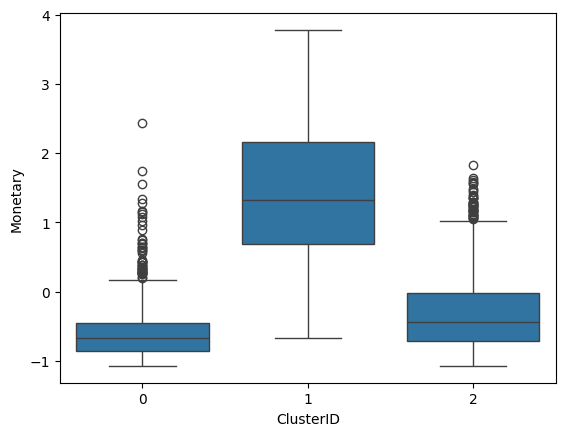

In [46]:
# Boxplot to visualize ClusterID vs Monetary

sns.boxplot(x = 'ClusterID', y = 'Monetary', data = rfm_df)

<Axes: xlabel='ClusterID', ylabel='Frequency'>

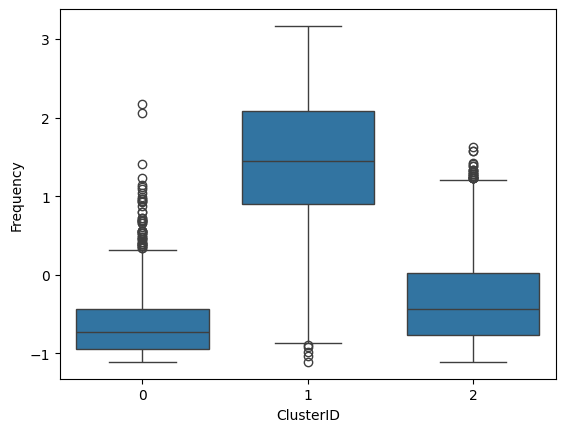

In [47]:
# Boxplot to visualize ClusterID vs Frequency

sns.boxplot(x = 'ClusterID', y = 'Frequency', data = rfm_df)

<Axes: xlabel='ClusterID', ylabel='Recency'>

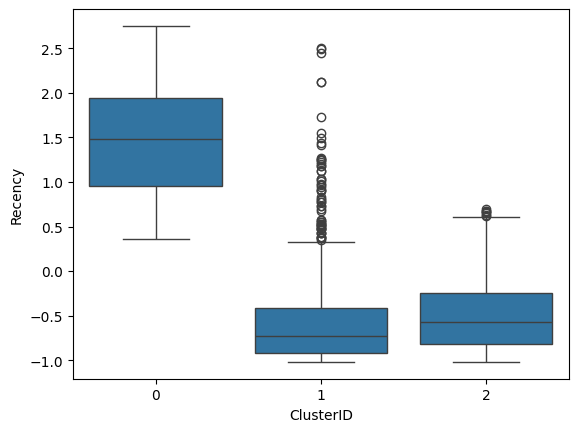

In [48]:
# Boxplot to visualize ClusterID vs Recency

sns.boxplot(x = 'ClusterID', y = 'Recency', data = rfm_df)

In [49]:
rfm_df['ClusterID'].max()

2

In [50]:
rfm_df[rfm_df['ClusterID'] == 2]

,Monetary,Frequency,Recency,ClusterID
0,1.293506,-0.384284,-0.245934,2
8,0.464662,-0.674179,-1.007706,2
11,-0.346898,-0.577547,0.119300,2
14,-0.851571,-0.867442,-0.986835,2
17,0.635890,0.123032,-0.277239,2
...,...,...,...,...
3579,-0.842324,-0.867442,-0.715519,2
3580,-0.631628,-0.794968,-0.569426,2
3581,-0.928662,-0.939916,-0.423333,2
3582,-0.844985,-0.915758,-0.256369,2


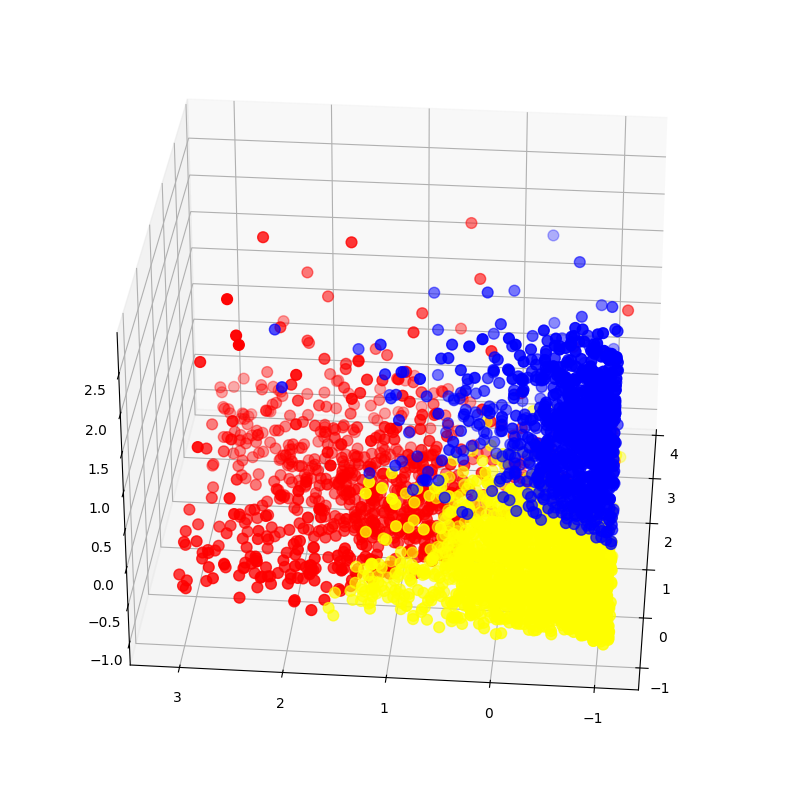

In [51]:
clusterID = kmeans.labels_
RFM = rfm_df
RFM['labels'] = clusterID
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(RFM["Monetary"][RFM.labels == 0], RFM["Frequency"][RFM.labels == 0], RFM["Recency"][RFM.labels == 0], c='blue', s=60)
ax.scatter(RFM["Monetary"][RFM.labels == 1],RFM["Frequency"][RFM.labels == 1], RFM["Recency"][RFM.labels == 1], c='red', s=60)
ax.scatter(RFM["Monetary"][RFM.labels == 2], RFM["Frequency"][RFM.labels == 2], RFM["Recency"][RFM.labels == 2], c='yellow', s=60)
ax.view_init(30, 185)
plt.show()

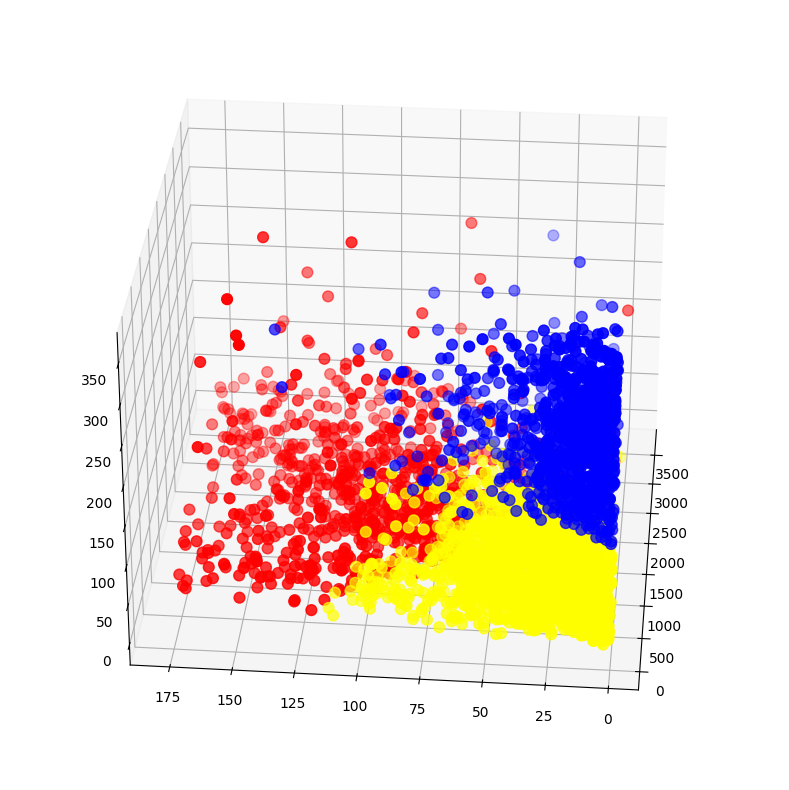

In [52]:
clusterID = kmeans.labels_
RFM = rfm
RFM['labels'] = clusterID
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(RFM["Monetary"][RFM.labels == 0], RFM["Frequency"][RFM.labels == 0], RFM["Recency"][RFM.labels == 0], c='blue', s=60)
ax.scatter(RFM["Monetary"][RFM.labels == 1],RFM["Frequency"][RFM.labels == 1], RFM["Recency"][RFM.labels == 1], c='red', s=60)
ax.scatter(RFM["Monetary"][RFM.labels == 2], RFM["Frequency"][RFM.labels == 2], RFM["Recency"][RFM.labels == 2], c='yellow', s=60)
ax.view_init(30, 185)
plt.show()

# **Motivation and Reasons For Choosing the Algorithm:**
I have choosen K-means clustering algorithm. It is one of the simplest and popular unsupervised machine learning algorithm.

The motivation for choosing a machine learning algorithm for online retail analysis is to gain insights into customer behaviour and preferences. By using machine learning algorithms, retailers can better understand customer buying patterns, identify trends, and make more informed decisions about product offerings and pricing and also can be used to optimize marketing campaigns and improve customer segmentation.

# **Model Evaluation and Techniques:**
Machine learning models can be used to analyze online retail data in order to gain insights into customer behavior and preferences. The most common techniques used for this purpose include supervised learning, unsupervised learning, and reinforcement learning.

# **Inference from tha same:**
K-Means Clustering with 3 Cluster Ids

Customers with Cluster Id 2 are the customers with high amount of transactions as compared to other customers.
Customers with Cluster Id 2 are frequent buyers.
Customers with Cluster Id 0 are not recent buyers and hence least of importance from business point of view.

# **Future Possibilities of the Project:**
The future possibilities of this project are endless. With the use of machine learning, the project can be used to analyze customer behavior and preferences, predict customer buying patterns, and recommend products to customers based on their past purchases. Additionally, machine learning can be used to identify trends in customer buying patterns and suggest new products or services that may be of interest to customers. Finally, machine learning can be used to optimize pricing and promotions to maximize customer satisfaction and profitability.

In [53]:
analysis = rfm.groupby('ClusterID').agg({
    'Recency':['mean','max','min'],
    'Frequency':['mean','max','min'],
    'Monetary':['mean','max','min','count']})

In [54]:
analysis

Recency             Frequency              Monetary           \
                 mean  max  min        mean  max min         mean      max   
ClusterID                                                                    
0          239.995633  361  132   21.610262  137   1   374.316681  2661.24   
1           44.848485  337    0  108.123737  178   1  1889.862905  3683.86   
2           50.356040  164    0   33.436402  114   1   577.409352  2207.40   

                         
              min count  
ClusterID                
0            3.75   916  
1          303.09   792  
2            0.00  1879

# **Customer Types based on RFM Analysis:**

# **Cluster 0 (Potentially Loyal Customers):**

**Recency:** Lower than ideal (average of 239.99 days since last purchase). This indicates these customers haven't purchased recently.

**Frequency:** Medium (average of 21.61 orders per customer). These customers tend to purchase somewhat regularly.

**Monetary Value:** Moderately high (average monetary value of $374.32). They spend a decent amount per purchase.

**Insights:** These customers could become loyal customers with some encouragement. They have a history of spending and purchase with some regularity.

**Recommendation:** 
Encourage them to become high-value customers with targeted campaigns such as:

->Discounts on bulk purchases or bundled products.

->ersonalized product recommendations based on their purchase history and browsing behavior.

# **Cluster 1 (Loyal Customers with High Potential Value):**

**Recency**: Average (mean of 44.85 days since last purchase). These customers purchase somewhat regularly.

**Frequency:** High (average of 108.12 orders per customer). They are frequent buyers.

**Monetary Value:** Highest (average monetary value of $1889.86). They spend the most per purchase on average.

**Insights:** These are likely to be your most valuable customers. They tend to purchase often and spend a lot per purchase. They are loyal customers with high potential value.

**Recommendation:** 
Retain these valuable customers and increase their spending by:

->Rewarding their loyalty with exclusive discounts, early access to new products, or personalized birthday offers.

->Offering them personalized product recommendations based on their purchase history.

# **Cluster 2 (Needs Engagement - Potentially at Risk):**

**Recency:** Highest (average of 50.36 days since last purchase). These customers have the most recent purchases on average.

**Frequency:** Lowest (average of 33.44 orders per customer). They purchase the least frequently.

**Monetary Value:** Lower than ideal (average monetary value of $577.41). They tend to spend less per purchase on average.

**Insights:** These customers might be at risk of churning because they haven't purchased frequently despite having recent purchases. They tend to spend less per purchase as well.

**Recommendation:** 
Win them back with targeted campaigns such as:

->Sending them special offers or highlighting products they might be interested in based on past purchases.

->Offering them a discount or loyalty program points to incentivize a purchase.



In [2]:
RFM  = pd.read_csv(r"C:\Users\Pragati Parmar\OneDrive\Desktop\ME\PYTHON\onlline reatails\Customer Types based on RFM Analysis.csv")

In [3]:
RFM

,Clusters,Customer Types,RFM Insights,Recommendation
0,Cluster 0,Potentially Loyal Customers,Customers purchase somewhat regularly (average...,- Encourage them to become high-value customer...
1,Cluster 1,Loyal Customers with High Potential Value,These are likely your most valuable customers ...,- Retain these valuable customers and increase...
2,Cluster 2,Needs Engagement (Potentially at Risk),Despite recent purchases (average 50.36 days a...,- Win them back with targeted campaigns - Sen...
